# 1.Implementation of Decision Tree Classifier

#### Load the Dataset
First, we'll load the dataset using pandas.

In [10]:
import pandas as pd
data = pd.read_csv(r"C:\Users\guntu\Downloads\Enjoy sports.csv")

In [12]:
# Display the dataset
print(data.head())

   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes


#### Create a Function to Calculate Entropy
Entropy measures the uncertainty in the dataset. The higher the entropy, the more disorder the dataset has.

In [15]:
import numpy as np

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = 0
    for i in range(len(elements)):
        probability = counts[i] / np.sum(counts)
        entropy_value -= probability * np.log2(probability)
    return entropy_value

#### Create a Function to Calculate Information Gain
Information Gain measures how much entropy is reduced after splitting on a particular feature.

In [20]:
def info_gain(data, split_attribute, target_name="Decision"):
    # Total entropy of the dataset before splitting
    total_entropy = entropy(data[target_name])

    # Split dataset by the unique values of the split_attribute
    values, counts = np.unique(data[split_attribute], return_counts=True)

    # Weighted entropy of each split
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attribute] == values[i]]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy

    # Calculate information gain
    gain = total_entropy - weighted_entropy
    return gain


#### Build the Decision Tree
We can now build a recursive function that uses the information gain to choose the best feature to split on at each step, creating the decision tree.

In [23]:
def decision_tree(data, original_data, features, target_name="Decision", parent_node=None):
    # If all target values are the same, return the target value
    if len(np.unique(data[target_name])) == 1:
        return np.unique(data[target_name])[0]

    # If the dataset is empty, return the mode of the original target
    elif len(data) == 0:
        return np.unique(original_data[target_name])[np.argmax(np.unique(original_data[target_name], return_counts=True)[1])]

    # If there are no more features to split on, return the mode of the current target
    elif len(features) == 0:
        return parent_node

    # Else, find the best feature to split on
    else:
        parent_node = np.unique(data[target_name])[np.argmax(np.unique(data[target_name], return_counts=True)[1])]

        # Calculate the information gain for each feature
        gains = [info_gain(data, feature, target_name) for feature in features]

        # Select the feature with the highest information gain
        best_feature_index = np.argmax(gains)
        best_feature = features[best_feature_index]

        # Create the tree structure
        tree = {best_feature: {}}

        # Remove the best feature from the feature set
        features = [i for i in features if i != best_feature]

        # Grow a branch for each value of the best feature
        for value in np.unique(data[best_feature]):
            subset = data[data[best_feature] == value]
            subtree = decision_tree(subset, original_data, features, target_name, parent_node)
            tree[best_feature][value] = subtree

        return tree
# Running the decision tree algorithm
features = list(data.columns)
features.remove("Decision")  # Remove target from the feature list
tree = decision_tree(data, data, features)
print(tree)

{'Day': {1: 'No', 2: 'No', 3: 'Yes', 4: 'Yes', 5: 'Yes', 6: 'No', 7: 'Yes', 8: 'No', 9: 'Yes', 10: 'Yes', 11: 'Yes', 12: 'Yes', 13: 'Yes', 14: 'No'}}


# 2.Decision Tree Using sklearn

#### Load the Dataset
First, load the dataset using pandas, just like before.

In [29]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\guntu\Downloads\Enjoy sports.csv")
print(data.head())

   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes


#### Use Label Encoding
Since sklearn requires numerical input, we will use label encoding to convert the categorical data.

In [34]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding to each column in the dataset
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Display the encoded data
print(data.head())

   Day  Outlook  Temp.  Humidity  Wind  Decision
0    0        2      1         0     1         0
1    1        2      1         0     0         0
2    2        0      1         0     1         1
3    3        1      2         0     1         1
4    4        1      0         1     1         1


#### Create a Decision Tree Classifier
Now, we will train the decision tree classifier on the encoded dataset.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# Split the data into features (X) and target (y)
X = data.drop('Decision', axis=1)
y = data['Decision']

In [41]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create a Decision Tree classifier and fit it to the data
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [49]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6666666666666666


#### Visualize the Decision Tree
Finally, we'll visualize the trained decision tree using plot_tree.

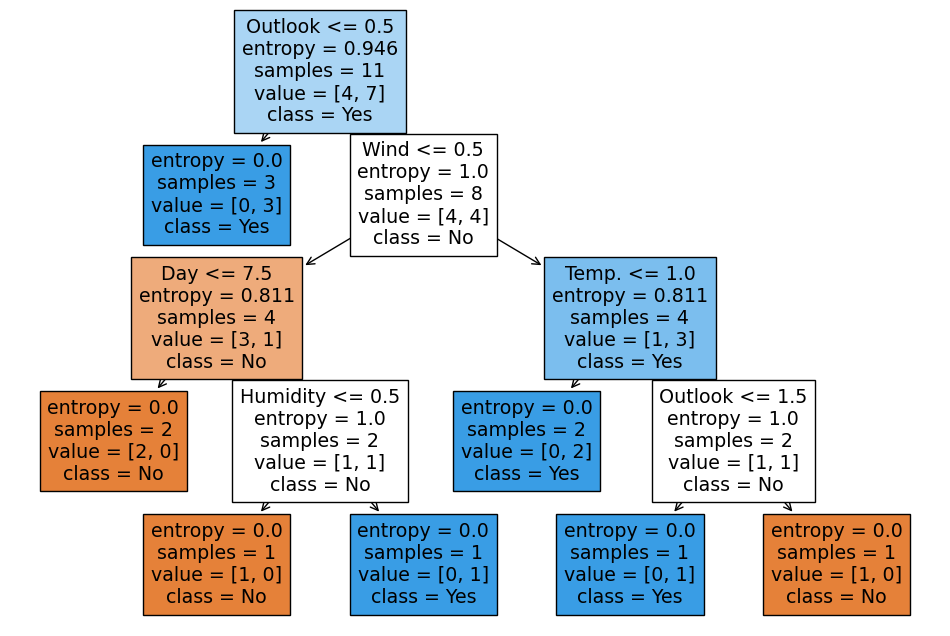

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()